In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.4, 0, 'barbara image')

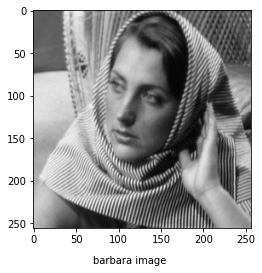

In [2]:
img = cv2.imread('../data/barbara256.png') # load an image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.figtext(0.4,0,'barbara image')

Text(0.4, 0, 'FFT of barbara image')

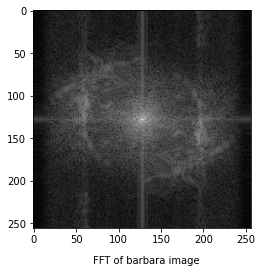

In [3]:
img = img/255.0
f = np.fft.fft2(np.float32(img))
f_shift = np.fft.fftshift(f)
f_complex = f_shift#f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.float32)
plt.imshow(f_img, cmap='gray')
plt.figtext(0.4,0,'FFT of barbara image')

Text(0.3, 0, 'low pass filtered D=40 image')

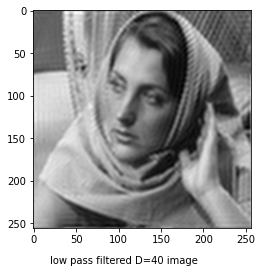

In [4]:
D = [40,80] #low pass filter
x = D[0]
a,b = np.int(f_img.shape[0]/2),np.int(f_img.shape[1]/2)
filter = np.zeros(img.shape)
filter[a-x-1:a+x,b-x-1:b+x] = 1
lpf_filter40 = filter.copy()
flt_img = f_complex*filter
flt_img = np.fft.ifftshift(flt_img)
flt_img = np.real(np.fft.ifft2(flt_img))
plt.imshow(flt_img, cmap='gray')
plt.figtext(0.3,0,'low pass filtered D=40 image')

Text(0.3, 0, 'low pass filtered D=80 image')

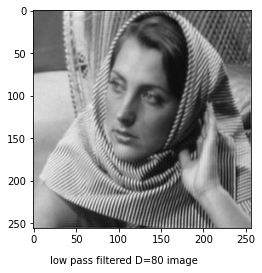

In [5]:
D = [40,80] #low pass filter
x = D[1]
a,b = np.int(f_img.shape[0]/2),np.int(f_img.shape[1]/2)
filter = np.zeros(img.shape)
filter[a-x-1:a+x,b-x-1:b+x] = 1
lpf_filter80 = filter.copy()
flt_img = f_complex*filter
flt_img = np.fft.ifftshift(flt_img)
flt_img = np.real(np.fft.ifft2(flt_img))
plt.imshow(flt_img, cmap='gray')
plt.figtext(0.3,0,'low pass filtered D=80 image')

Text(0.3, 0, 'gaussian low pass filtered D=40 image')

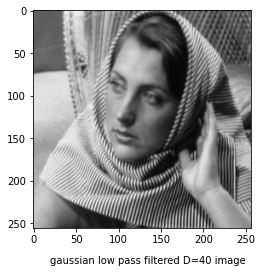

In [6]:
D = [40,80] #gaussian low pass filter
x = D[0]
a,b = np.int(f_img.shape[0]),np.int(f_img.shape[1])
h,g = np.meshgrid(np.linspace(-1,1,a), np.linspace(-1,1,b))
d = np.sqrt(h*h+g*g)
sigma, mu = x, 0.0
filter = np.exp(-((d-mu)**2 / (2.0*sigma**2)))
filter = filter/np.max(filter)
g_filter40 = filter.copy()
flt_img = f_complex*filter
flt_img = np.fft.ifftshift(flt_img)
flt_img = np.real(np.fft.ifft2(flt_img))
plt.imshow(flt_img, cmap='gray')
plt.figtext(0.3,0,'gaussian low pass filtered D=40 image')

Text(0.3, 0, 'gaussian low pass filtered D=80 image')

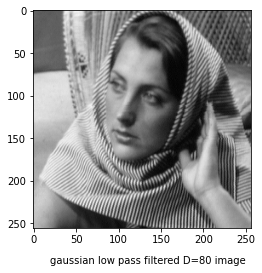

In [7]:
D = [40,80] #gaussian low pass filter
x = D[1]
a,b = np.int(f_img.shape[0]),np.int(f_img.shape[1])
h,g = np.meshgrid(np.linspace(-1,1,a), np.linspace(-1,1,b))
d = np.sqrt(h*h+g*g)
sigma, mu = x, 0.0
filter = np.exp(-((d-mu)**2 / (2.0*sigma**2)))
filter = filter/np.max(filter)
g_filter80 = filter.copy()
flt_img = f_complex*filter
flt_img = np.fft.ifftshift(flt_img)
flt_img = np.real(np.fft.ifft2(flt_img))
plt.imshow(flt_img, cmap='gray')
plt.figtext(0.3,0,'gaussian low pass filtered D=80 image')

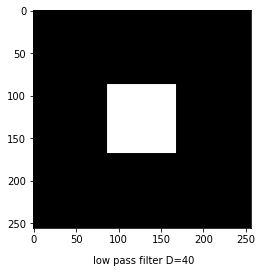

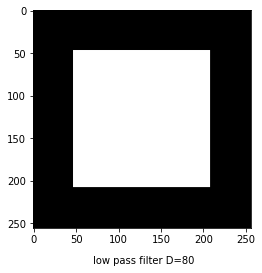

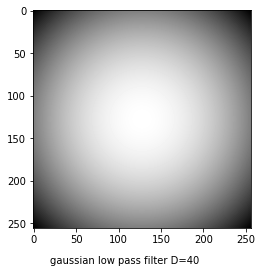

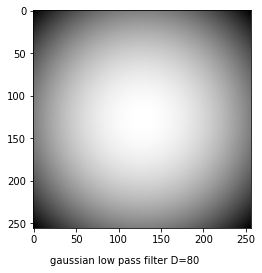

In [10]:
plt.imshow(lpf_filter40,cmap='gray')
plt.figtext(0.4,0,'low pass filter D=40')
plt.show()
plt.imshow(lpf_filter80,cmap='gray')
plt.figtext(0.4,0,'low pass filter D=80')
plt.show()
g_filter40f = np.log(1+g_filter40)
#g_filter40f = (g_filter40f-np.min(g_filter40f))/(np.max(g_filter40f)-np.min(g_filter40f))
plt.imshow(g_filter40f,cmap='gray')
plt.figtext(0.3,0,'gaussian low pass filter D=40')
plt.show()
g_filter80f = np.log(1+g_filter80)
#g_filter80f = (g_filter80f-np.min(g_filter80f))/(np.max(g_filter80f)-np.min(g_filter80f))
plt.imshow(g_filter80f,cmap='gray')
plt.figtext(0.3,0,'gaussian low pass filter D=80')
plt.show()